## Learning Algorithm
This is an implementation of vanilla DQN and Double DQN, whose papers are referenced in the README.md file.

I used the solution code to the DQN module as a starting point, which is located here:
https://github.com/udacity/deep-reinforcement-learning/tree/master/dqn

This implementation of a DQN is a straightforward implementation, the only difference being it uses's a soft update procedure to update the parameters of the target network. There is also a flag to set that will modify the algorithm slightly into a Double DQN implementation.

## Model Architecture

The model used is a simple neural network consisting of 3 fully connected layers. The model takes as input a vector of the state space (37 states), runs it through a first layer of 64 connected units, then a second layer of 64 units again, and finally through a classification layer that outputs a vector of probabilities the respective action space (4 in this case).

## Hyper parameters

I started out with the default parameters in the starter code:

BUFFER_SIZE = int(1e5)  # replay buffer size

BATCH_SIZE = 64         # minibatch size

GAMMA = 0.99            # discount factor

TAU = 1e-3              # for soft update of target parameters

LR = 5e-4               # learning rate

UPDATE_EVERY = 4        # how often to update the network

use_double_dqn = False
use_soft_update = True


### Submission parameters: 

The best result was acheived using the following hyperparameters:

lr = .00025
use_double_dqn = False
use_soft_update = True

You can see the output of my experiments in the following code cell's.

Cell 20 show's the best result with these hyperparameter's.

`results/5/checkpoint.pth` has my submission model weights.


### Future work and improvements.

- Check Double DQN implementation, is it correct? If it is, why didn't it improvement performance?

- Implement Dueling DQN.
- Implement Prioritized Experience Replay.
- Try other ideas from the Rainbow paper.
- Setup grid search of combinations of hyperparemeters and algorithm modifications to systematically find best result.
- See TODO.txt for other ideas I planned to explore.

### Testing a Trained Agent

The last cell in this notebook shows the code to test a trained agent, however I have not submitted a video as even though my implementation appears to pass the project criteria, when I run the trained agent it does appear to be playing the game very well. Perhaps my reviewer can point me in the correct direction as to why?

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
# plot the scores
def plot_scores(scores):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.plot(np.arange(len(scores)), scores)
    plt.ylabel('Score')
    plt.xlabel('Episode #')
    plt.show()

In [4]:
from unityagents import UnityEnvironment
env = UnityEnvironment(file_name="Banana.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [15]:
env.close()

In [5]:
from runner import Runner
runner = Runner(env)

In [7]:
scores = runner.run()

Episode 100	Average Score: 1.73
Episode 200	Average Score: 6.83
Episode 300	Average Score: 9.32
Episode 400	Average Score: 11.69
Episode 500	Average Score: 12.57
Episode 600	Average Score: 13.22
Episode 675	Average Score: 14.04
Environment solved in 575 episodes!	Average Score: 14.04

Time taken to solve: 15.76 minutes


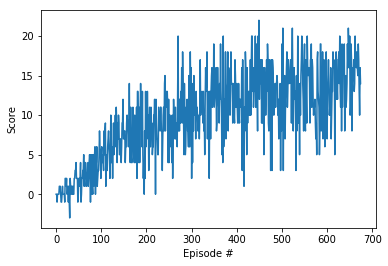

In [8]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

Episode 100	Average Score: 2.15
Episode 200	Average Score: 6.46
Episode 300	Average Score: 9.09
Episode 400	Average Score: 10.49
Episode 500	Average Score: 11.63
Episode 600	Average Score: 13.66
Episode 612	Average Score: 14.07
Environment solved in 512 episodes!	Average Score: 14.07

Time taken to solve: 14.46 minutes


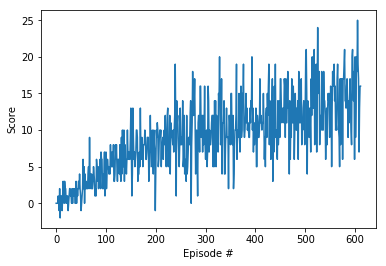

In [10]:
scores = runner.run(run_id=2, max_t=2000)
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

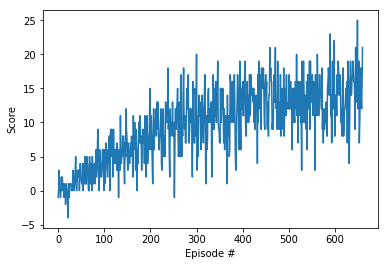

In [13]:
#scores = runner.run(run_id=3, max_t=4000)
plot_scores(scores)

Seems like increasing max_t (number of time steps per episode) is not having any meaningful positive effect on average score, or number of episodes it takes to solve the environment.

Let's try decreasing max_t instead:

Episode 100	Average Score: 1.75
Episode 200	Average Score: 6.21
Episode 300	Average Score: 8.64
Episode 400	Average Score: 10.69
Episode 500	Average Score: 12.47
Episode 600	Average Score: 13.51
Episode 628	Average Score: 14.01
Environment solved in 528 episodes!	Average Score: 14.01

Time taken to solve: 14.98 minutes


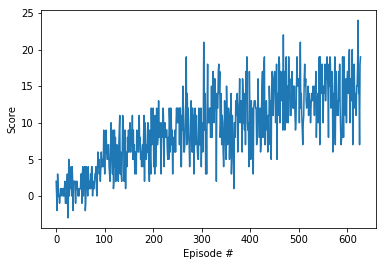

In [14]:
scores = runner.run(run_id=4, max_t=500)
plot_scores(scores)

Changing max_t seems to have a neglible effect, let's try changing the learning rate to .00025 from .0005 which is used in the DQN paper.

Episode 100	Average Score: 0.63
Episode 200	Average Score: 4.14
Episode 300	Average Score: 7.46
Episode 400	Average Score: 11.17
Episode 500	Average Score: 13.90
Episode 508	Average Score: 14.00
Environment solved in 408 episodes!	Average Score: 14.00

Time taken to solve: 11.30 minutes


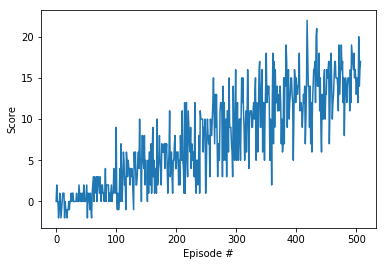

In [20]:
scores = runner.run(run_id=5, lr=.00025)
plot_scores(scores)

In [ ]:
# decreasing the learning rate seems to have helped, environment solved in !100 less episodes.

Episode 100	Average Score: 0.96
Episode 200	Average Score: 4.74
Episode 300	Average Score: 7.59
Episode 400	Average Score: 10.80
Episode 500	Average Score: 13.33
Episode 537	Average Score: 14.02
Environment solved in 437 episodes!	Average Score: 14.02

Time taken to solve: 12.28 minutes


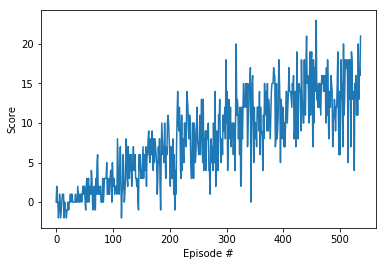

In [6]:
scores = runner.run(run_id=6, lr=.00025)
plot_scores(scores)

Episode 100	Average Score: 0.28
Episode 200	Average Score: 3.28
Episode 300	Average Score: 7.36
Episode 400	Average Score: 10.41
Episode 500	Average Score: 12.80
Episode 574	Average Score: 14.00
Environment solved in 474 episodes!	Average Score: 14.00

Time taken to solve: 11.74 minutes


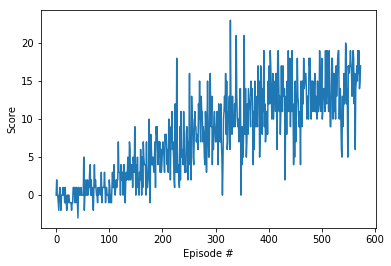

In [6]:
scores = runner.run(run_id=8, lr=.0005, use_double_dqn=True)
plot_scores(scores)

Episode 100	Average Score: 0.09
Episode 200	Average Score: 0.13
Episode 300	Average Score: 0.471
Episode 400	Average Score: 1.06
Episode 500	Average Score: 0.67
Episode 600	Average Score: 1.87
Episode 700	Average Score: 3.02
Episode 800	Average Score: 4.10
Episode 900	Average Score: 5.36
Episode 1000	Average Score: 5.84
Episode 1100	Average Score: 6.34
Episode 1200	Average Score: 6.29
Episode 1300	Average Score: 6.57
Episode 1400	Average Score: 8.00
Episode 1500	Average Score: 8.98
Episode 1600	Average Score: 10.14
Episode 1700	Average Score: 10.11
Episode 1800	Average Score: 9.492
Episode 1900	Average Score: 11.14
Episode 2000	Average Score: 10.64


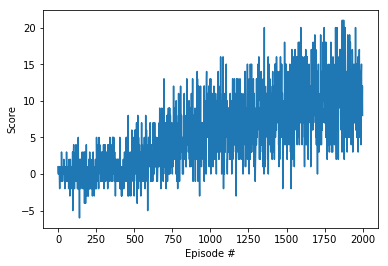

In [7]:
scores = runner.run(run_id=9, lr=.00025, use_soft_update=False)
plot_scores(scores)

Episode 100	Average Score: 0.69
Episode 200	Average Score: 3.60
Episode 300	Average Score: 7.11
Episode 400	Average Score: 10.30
Episode 500	Average Score: 13.06
Episode 548	Average Score: 14.07
Environment solved in 448 episodes!	Average Score: 14.07

Time taken to solve: 12.72 minutes


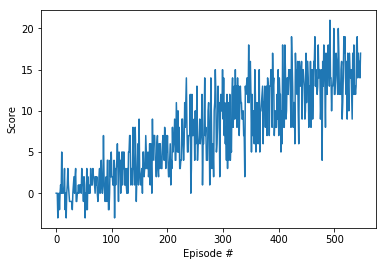

In [8]:
scores = runner.run(run_id=9, lr=.00025)
plot_scores(scores)

In [8]:
# Watch a Smart Agent

from runner import Runner
runner = Runner(env)
runner.test(run_id=5)